In [81]:
# Importing packages
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [82]:
# Loading dataset
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\my_random_projects\Logistic Regression\Heart disease.csv')
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


# Cleaning and Preprocessing

#### Renaming some columns

In [84]:
df.rename(columns={'male': 'gender'}, inplace=True)

#### Handling duplicates

In [85]:
print(df[df.duplicated()])
#count duplicates
print(df.duplicated().sum())

Empty DataFrame
Columns: [gender, age, education, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []
0


### Handling null values

In [86]:
print(df.isnull().sum())
df[df.isnull().any(axis=1)]

gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,0,39,2.0,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,NaN,0
21,0,43,1.0,0,0.0,0.0,0,0,0,185.0,123.5,77.5,29.89,70.0,NaN,0
26,0,60,1.0,0,0.0,0.0,0,0,0,260.0,110.0,72.5,26.59,65.0,NaN,0
33,1,61,NaN,1,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
36,1,56,NaN,0,0.0,0.0,0,0,0,257.0,153.5,102.0,28.09,72.0,75.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,0,51,1.0,1,9.0,0.0,0,0,0,340.0,152.0,76.0,25.74,70.0,NaN,0
4229,0,51,3.0,1,20.0,0.0,0,1,0,251.0,140.0,80.0,25.60,75.0,NaN,0
4230,0,56,1.0,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0


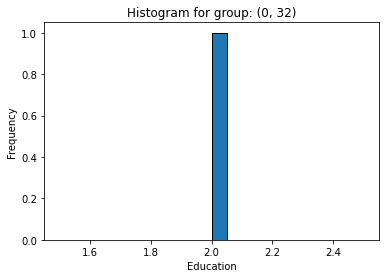

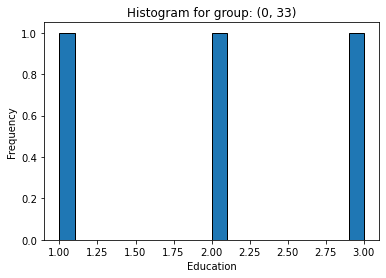

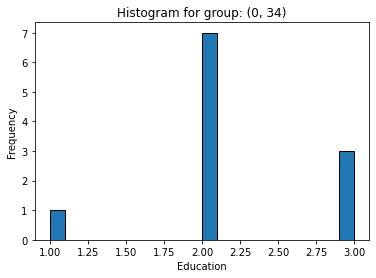

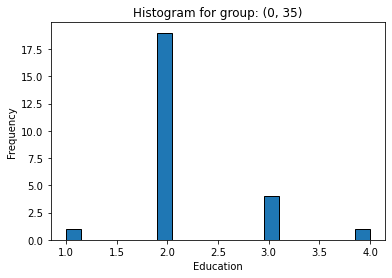

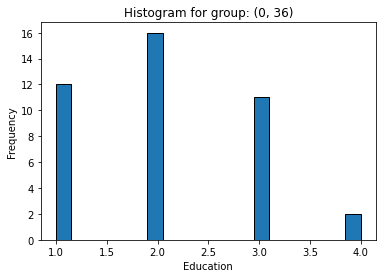

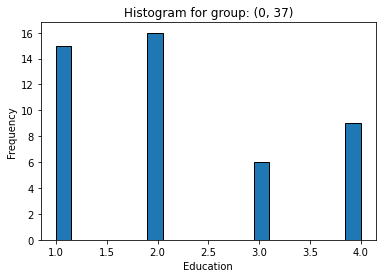

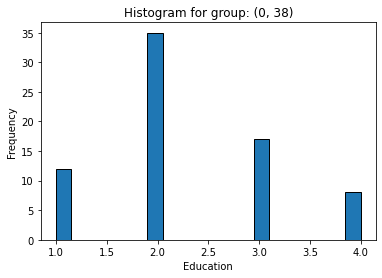

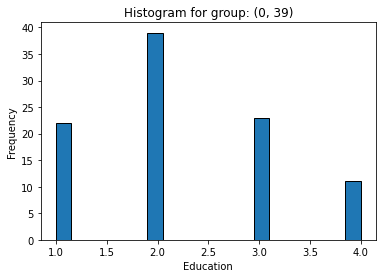

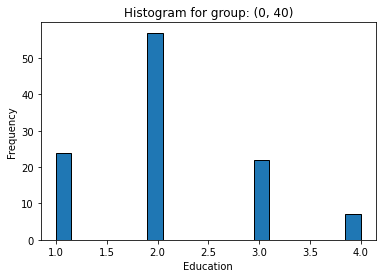

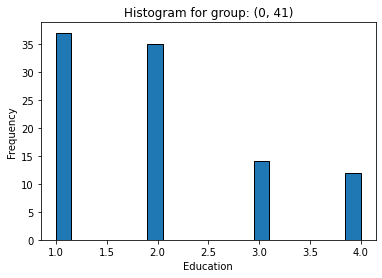

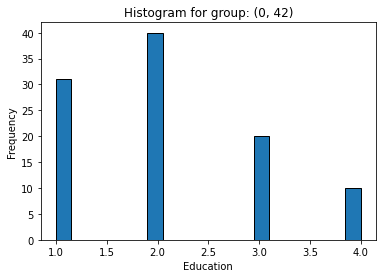

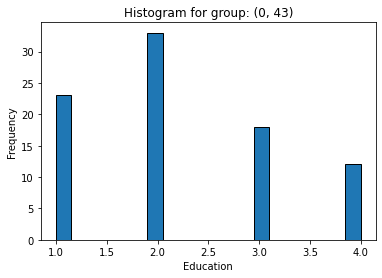

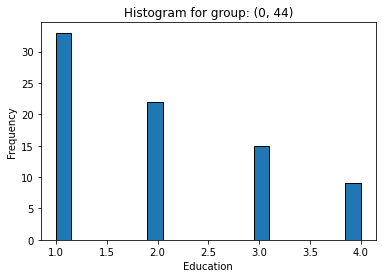

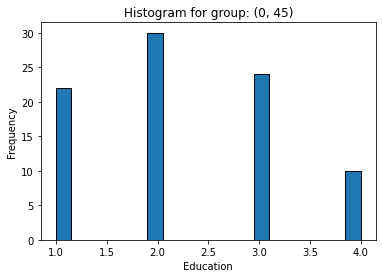

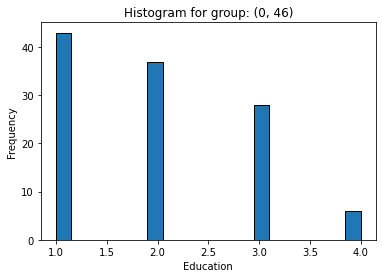

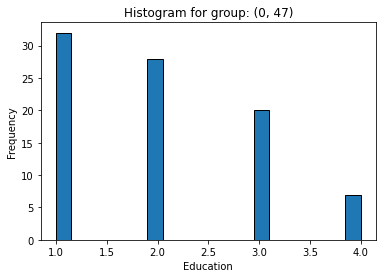

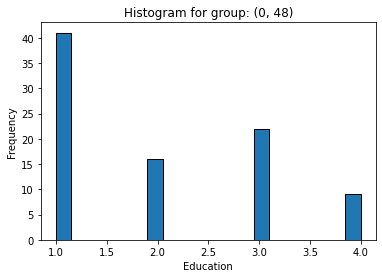

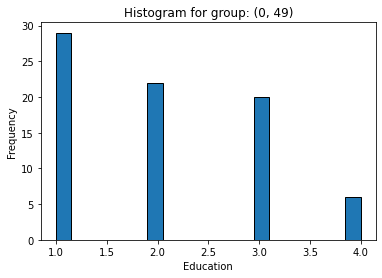

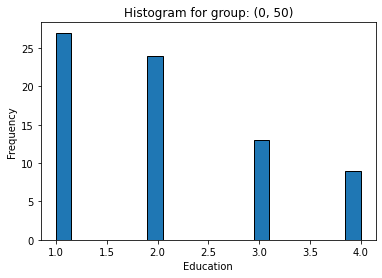

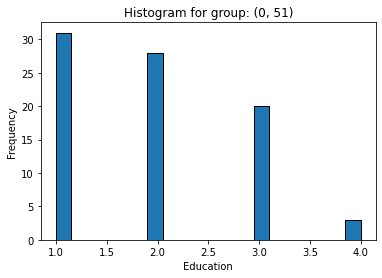

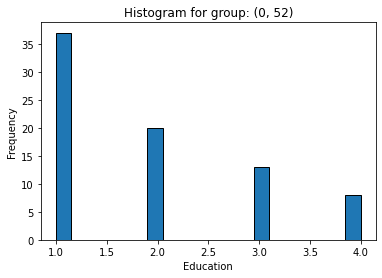

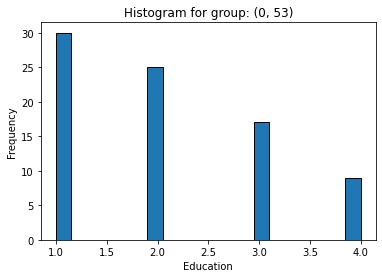

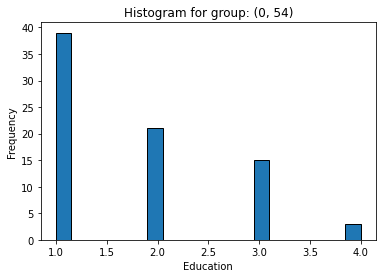

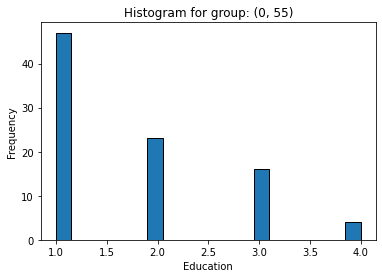

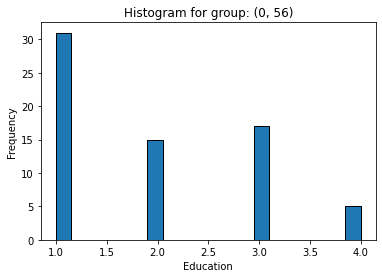

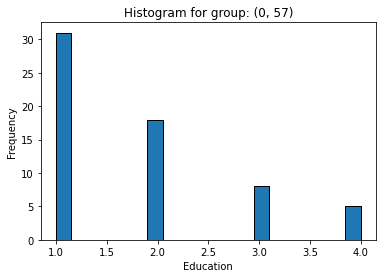

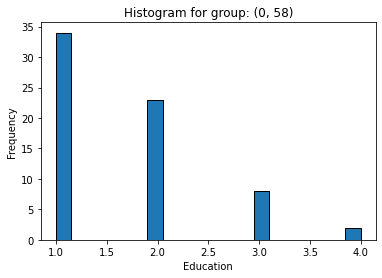

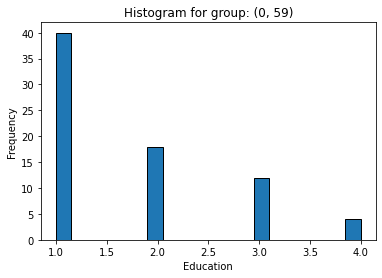

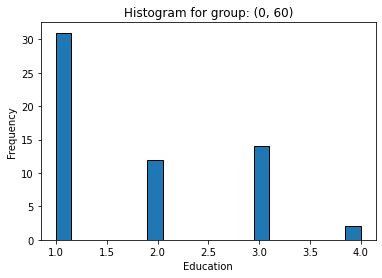

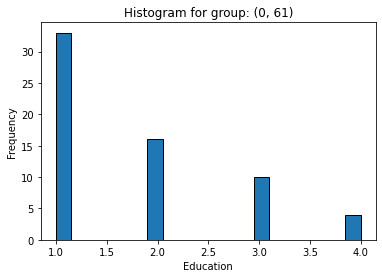

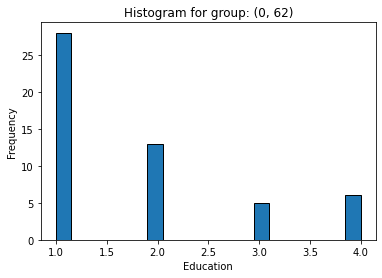

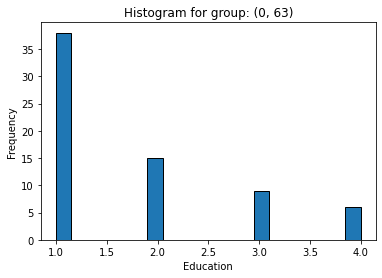

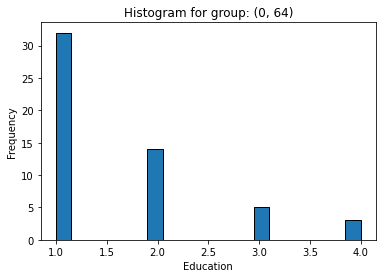

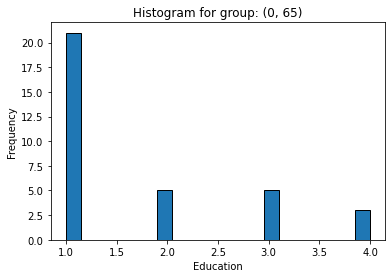

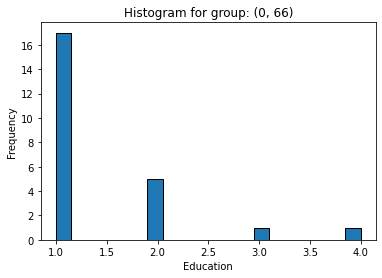

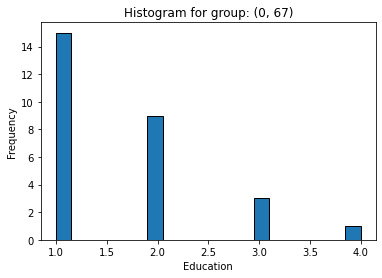

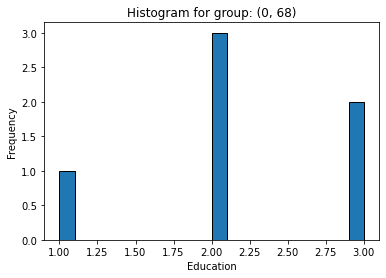

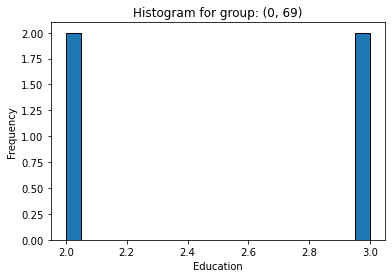

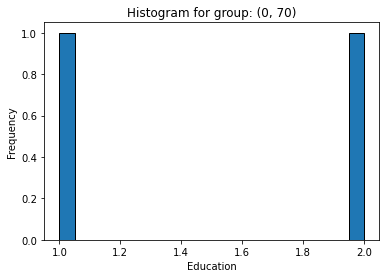

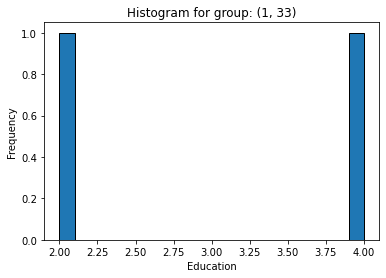

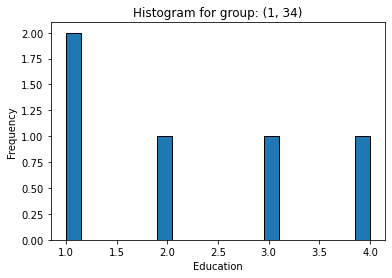

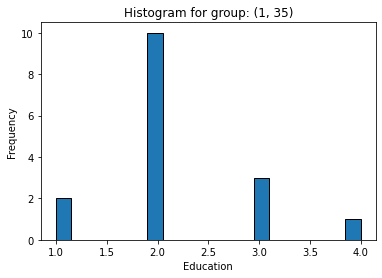

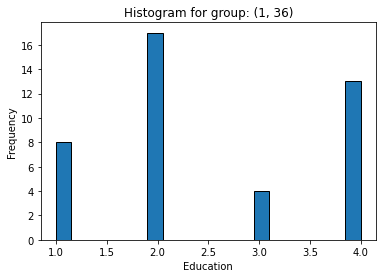

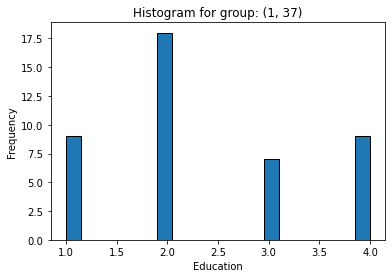

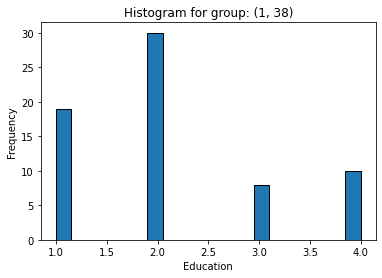

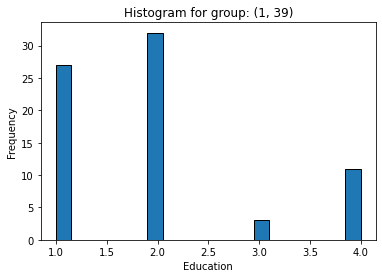

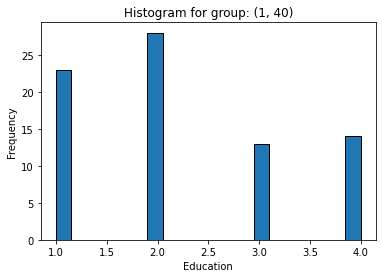

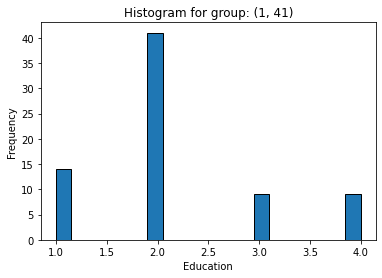

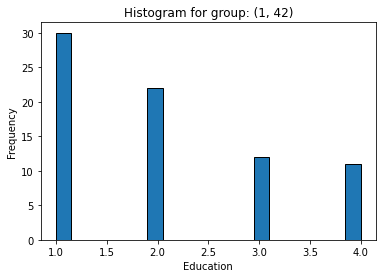

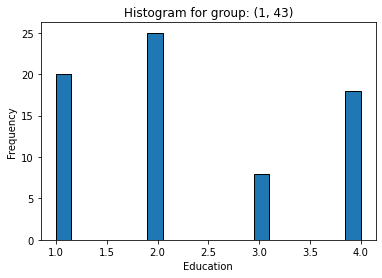

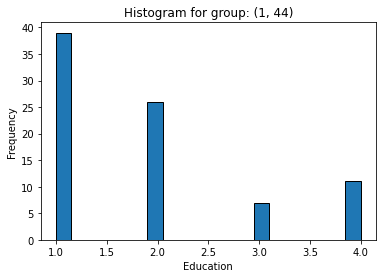

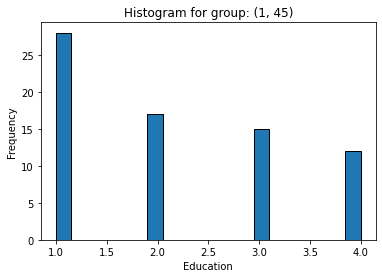

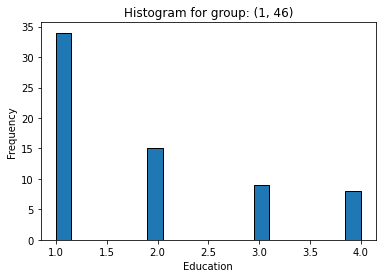

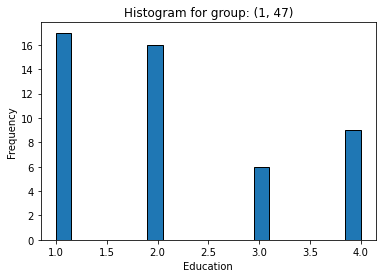

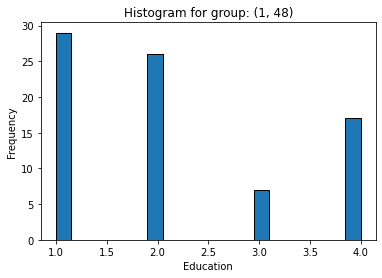

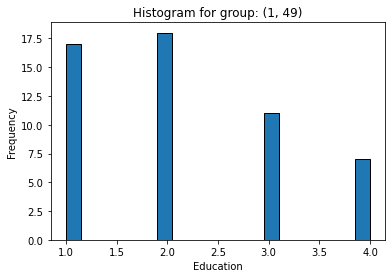

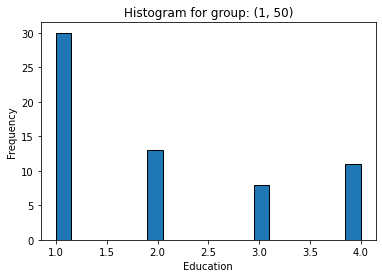

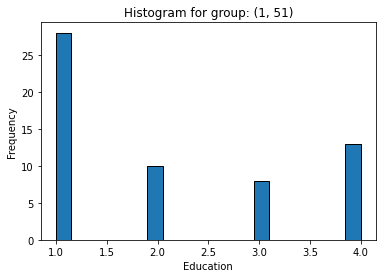

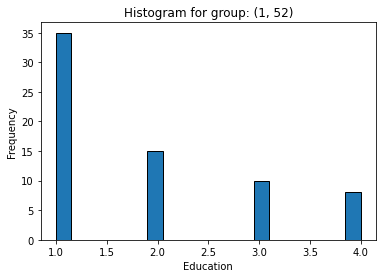

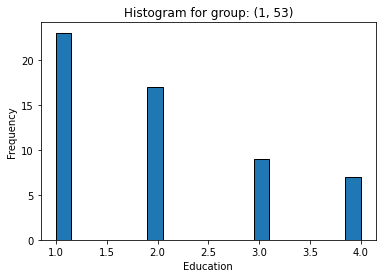

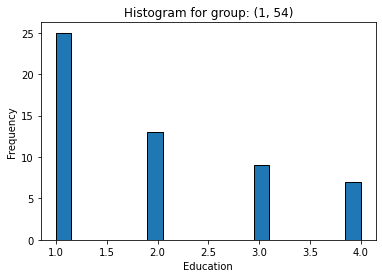

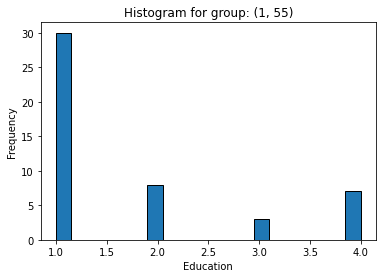

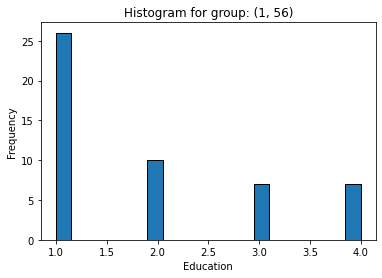

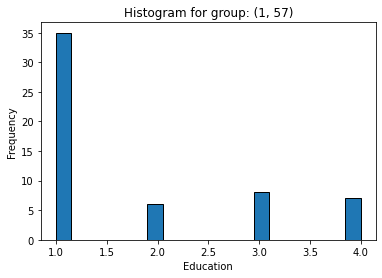

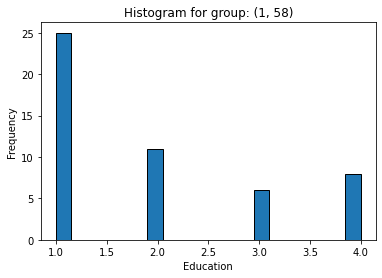

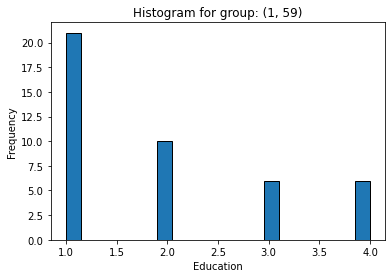

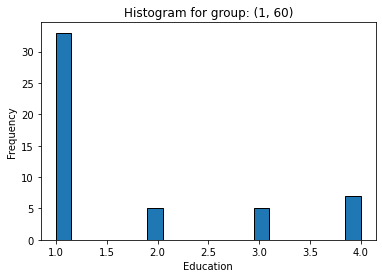

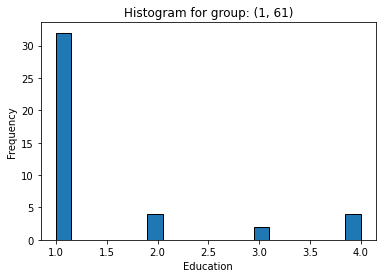

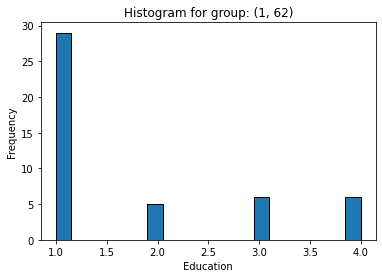

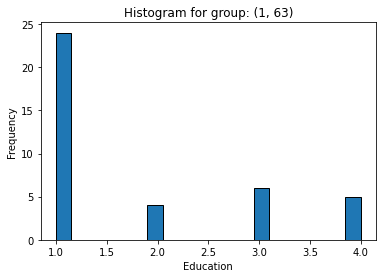

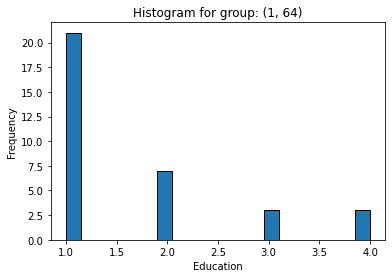

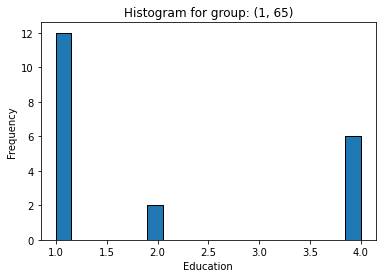

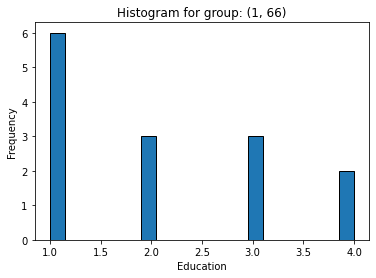

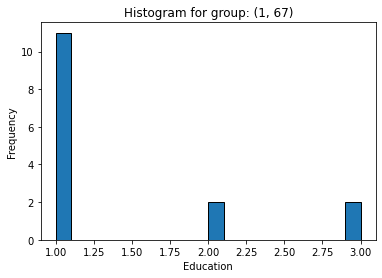

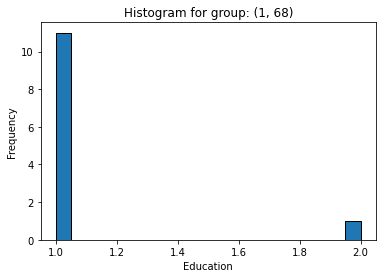

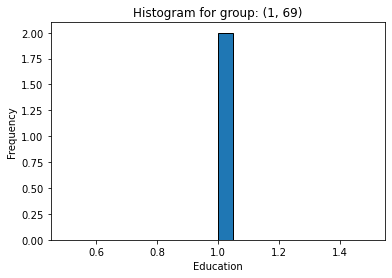

In [87]:
# checking skewness for education in some groups
for name, group in df.groupby(['gender', 'age']):
    plt.hist(group['education'].dropna(), bins=20, edgecolor='black')
    plt.title(f'Histogram for group: {name}')
    plt.xlabel('Education')
    plt.ylabel('Frequency')
    plt.show()

In [88]:
# since most of the groups had long tail on the left using median instead of mean to fill null values seems better!
# Fill missing education values based on median within groups of gender and age.
df['education'] = df['education'].fillna(df.groupby(['gender', 'age'])['education'].transform('median'))

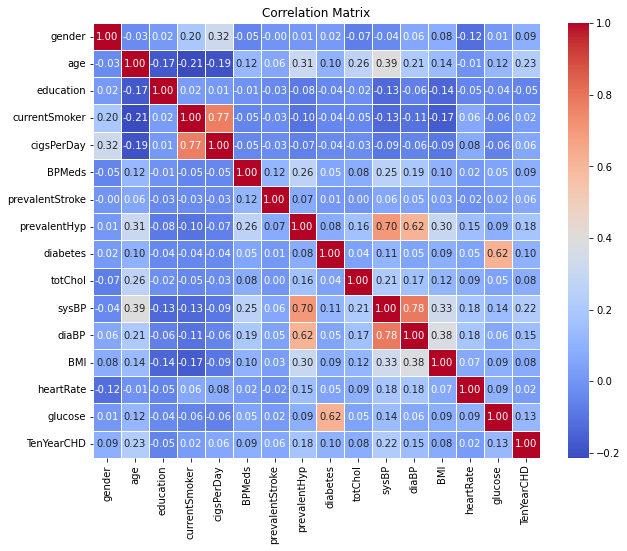

In [89]:
# Checking correlation between features and target
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

###### Removing cigsPerDay since there is a correlation of 0.77 between cigsPerDay and currentSmoker and there are some nulls in cigsPerDay.
###### keeping two of them while using a linear model (Logistic Regression)can affect the model's stability and interpretability.


In [90]:
df.drop(columns={'cigsPerDay'}, inplace=True)

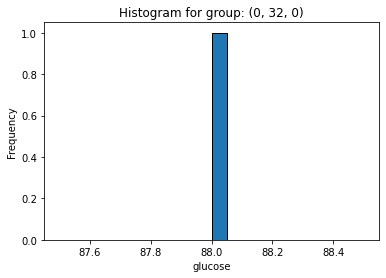

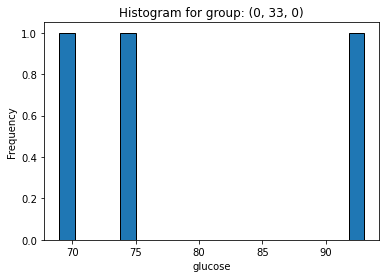

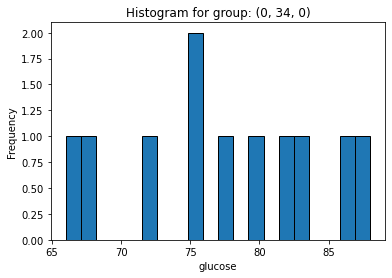

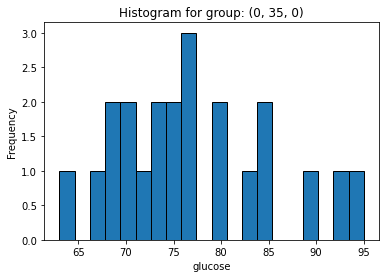

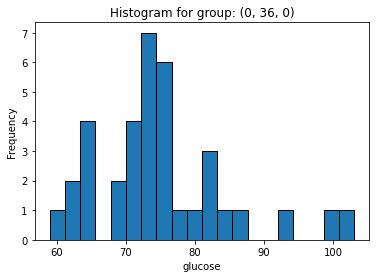

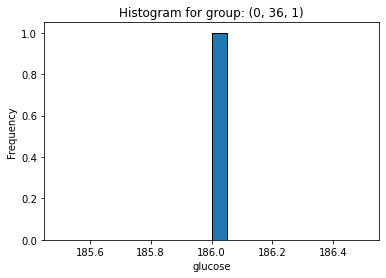

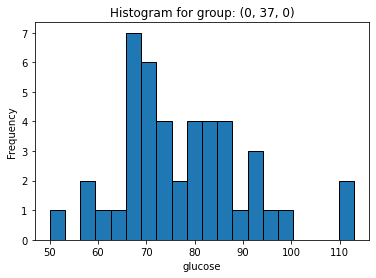

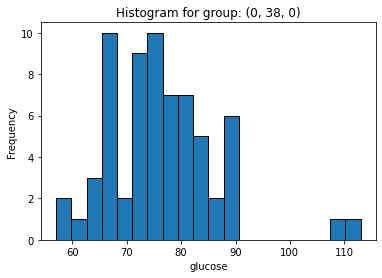

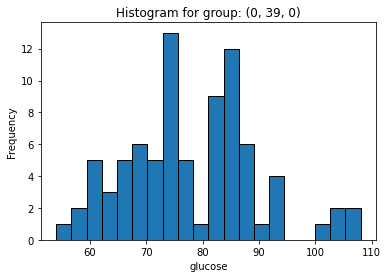

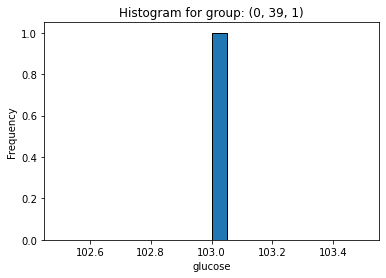

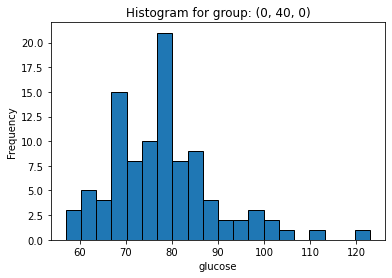

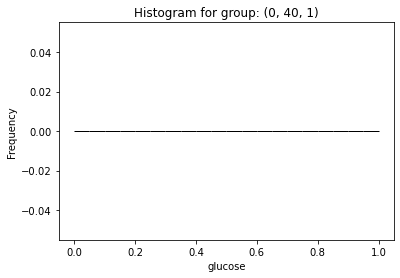

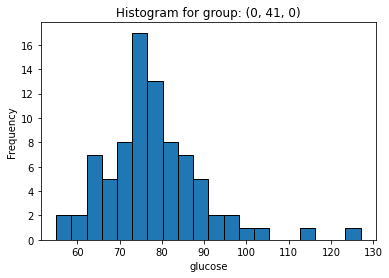

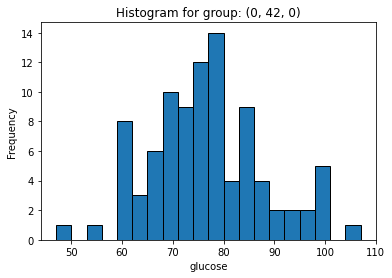

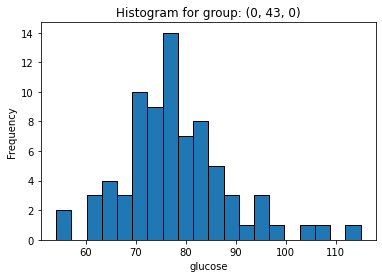

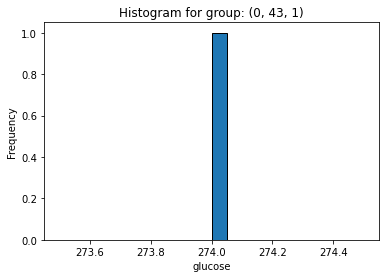

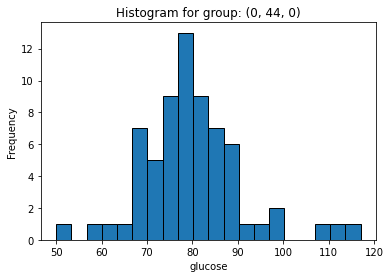

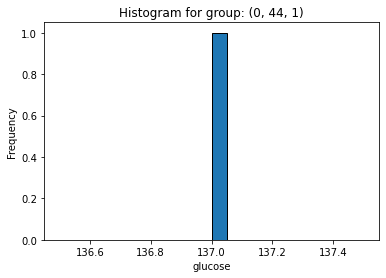

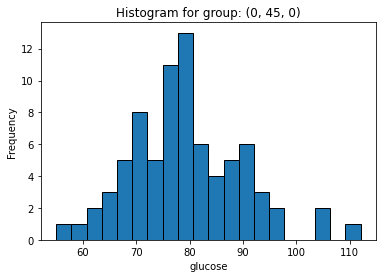

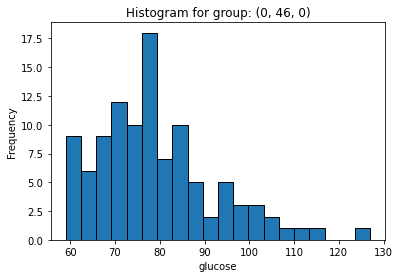

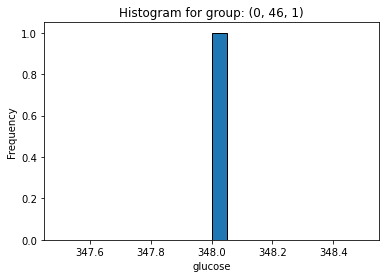

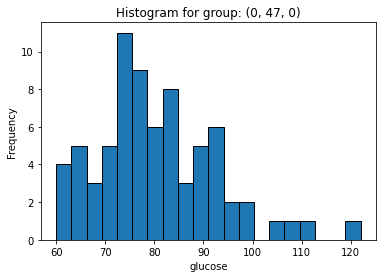

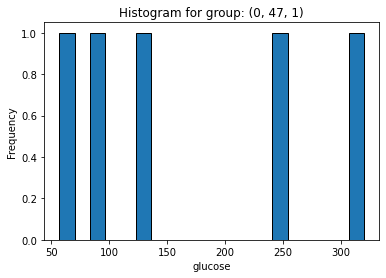

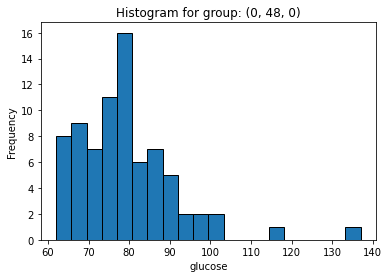

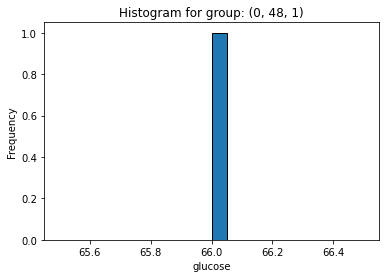

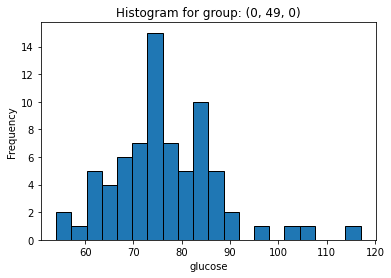

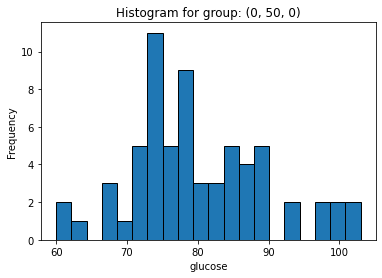

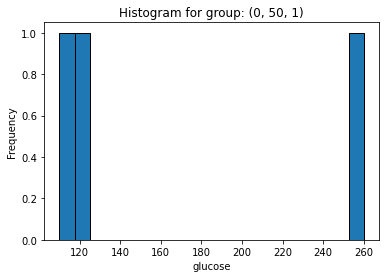

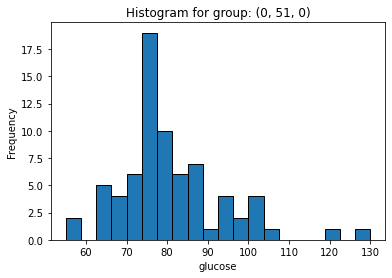

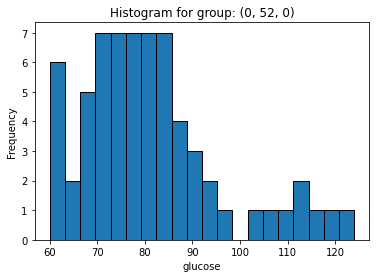

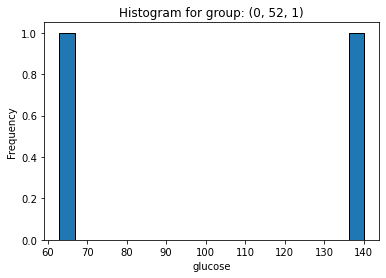

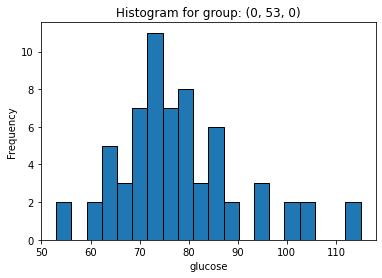

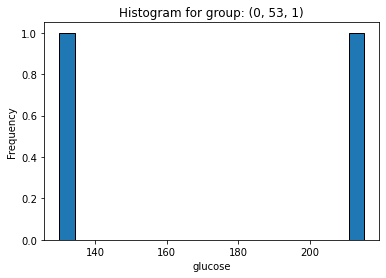

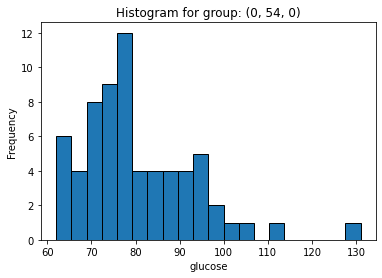

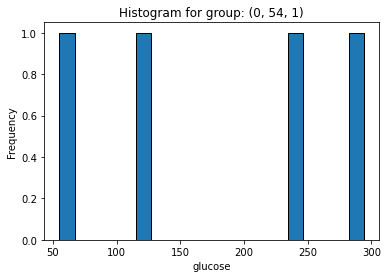

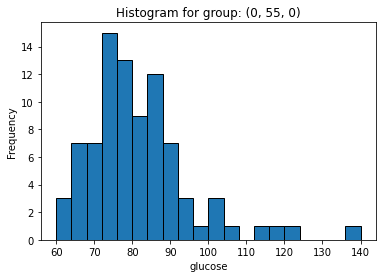

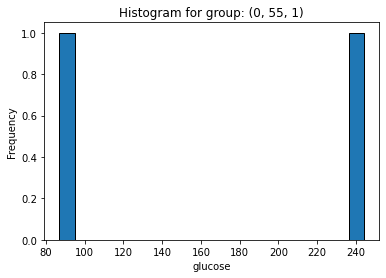

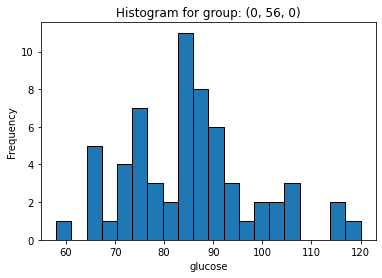

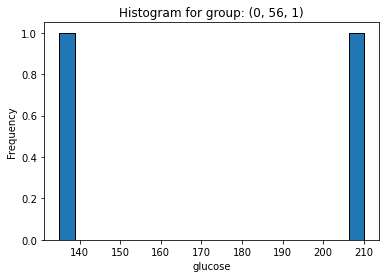

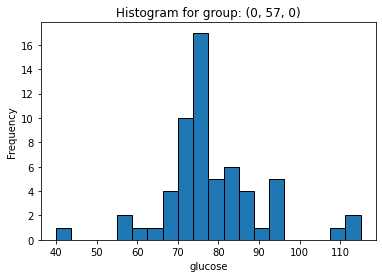

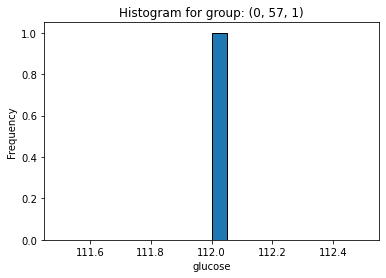

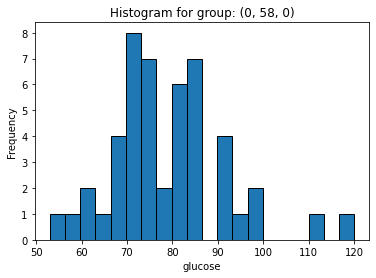

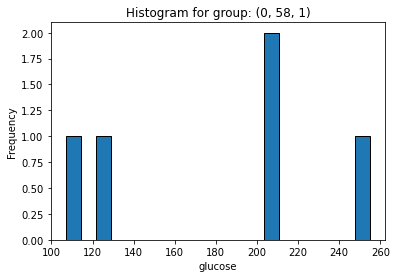

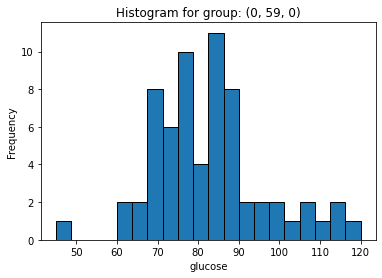

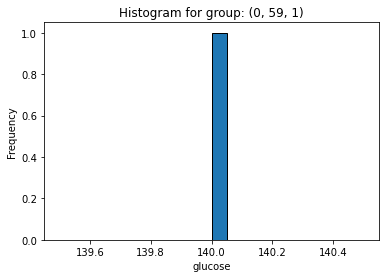

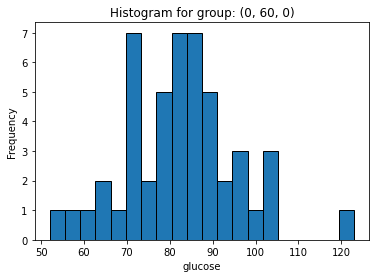

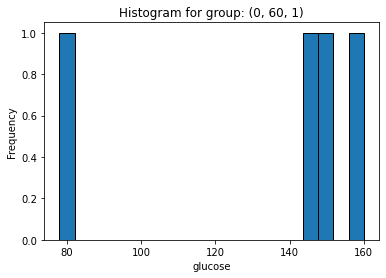

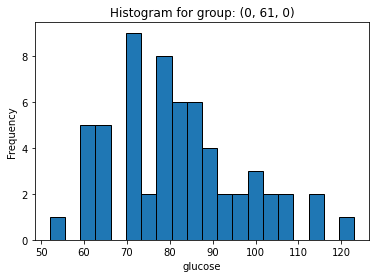

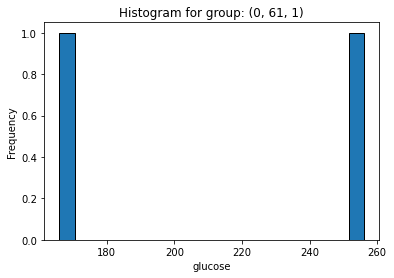

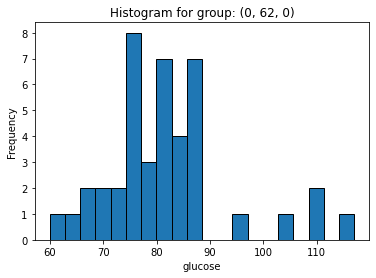

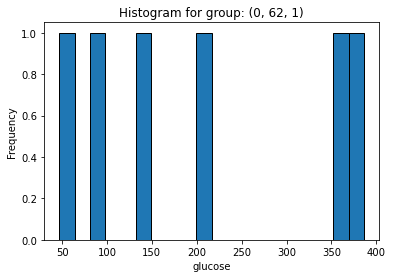

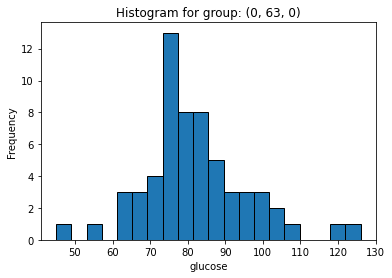

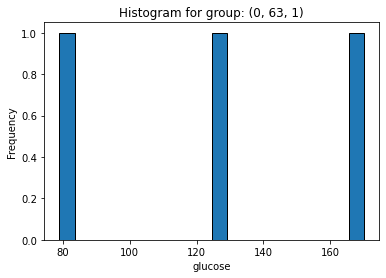

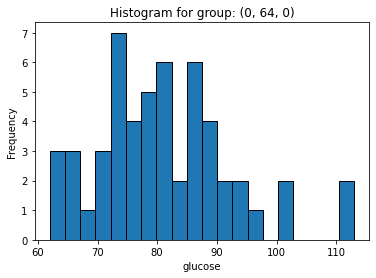

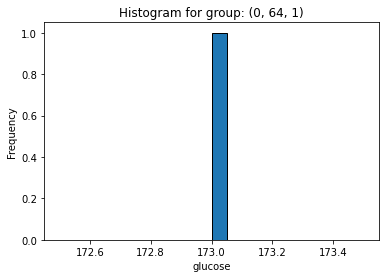

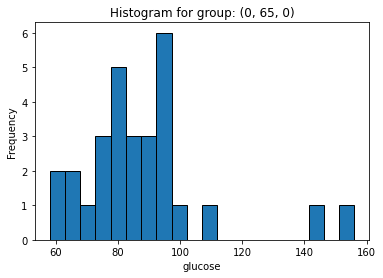

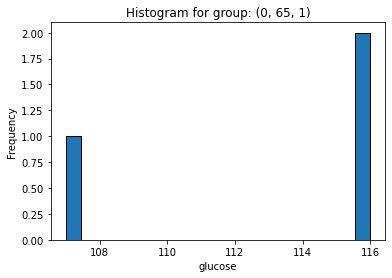

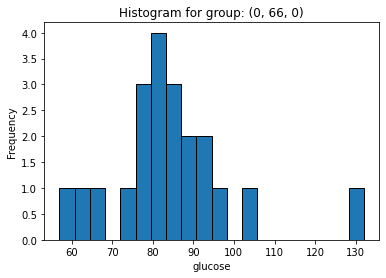

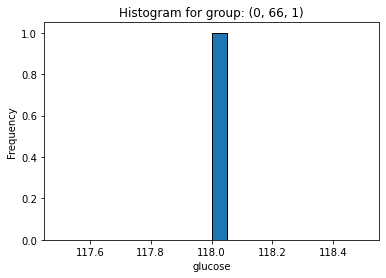

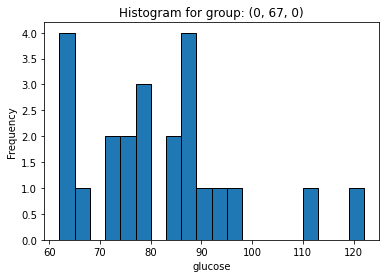

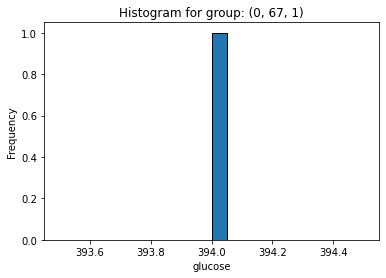

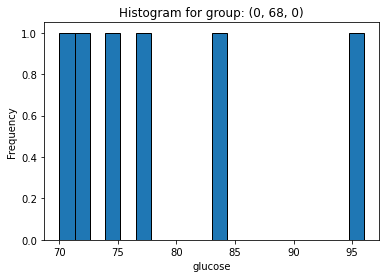

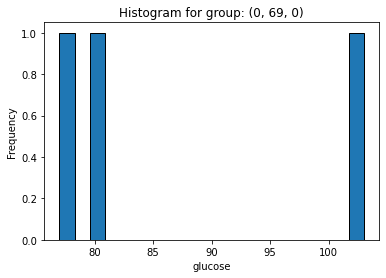

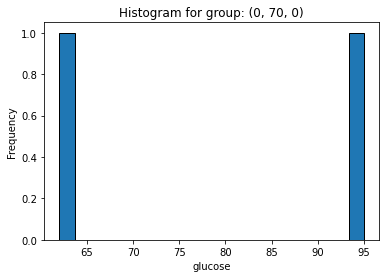

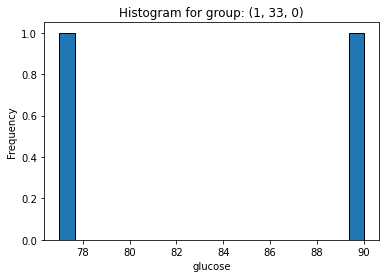

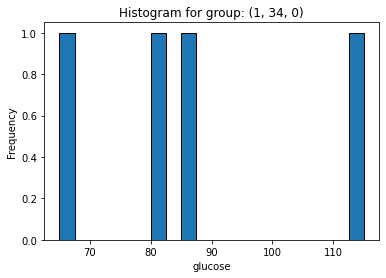

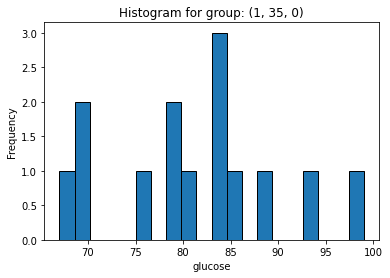

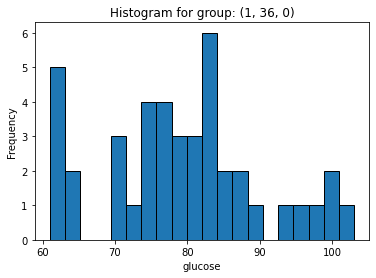

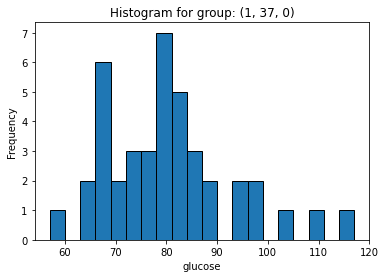

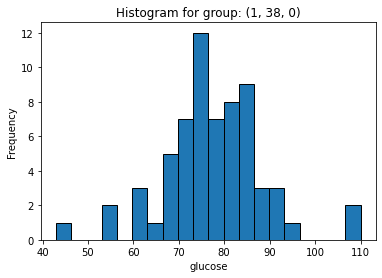

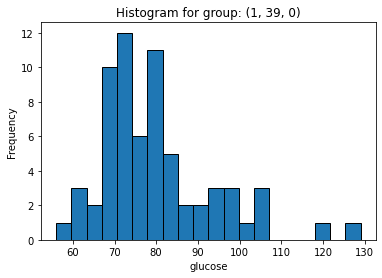

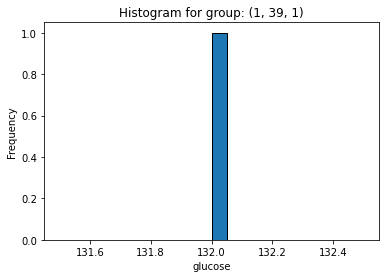

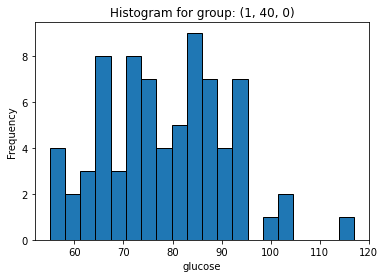

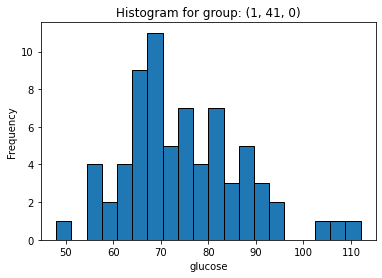

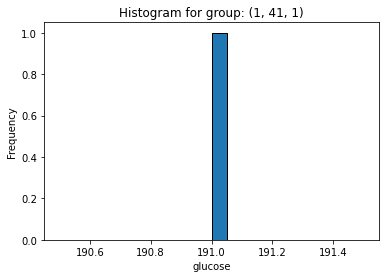

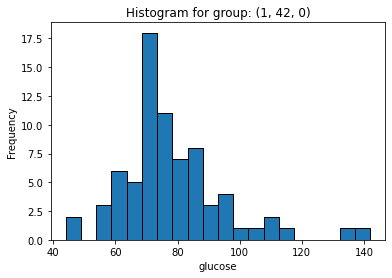

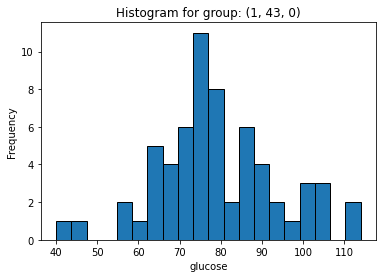

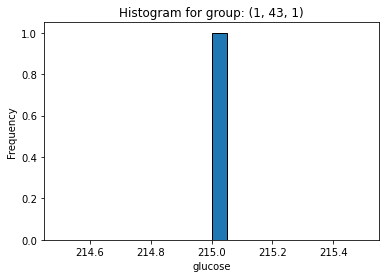

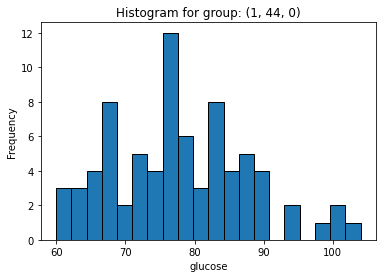

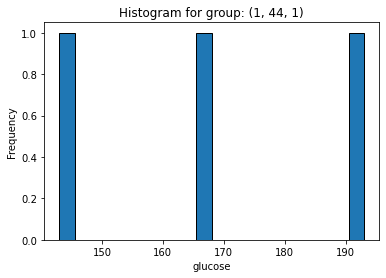

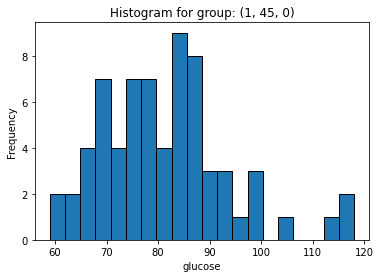

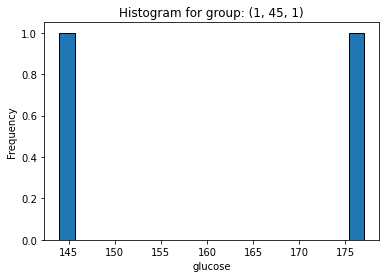

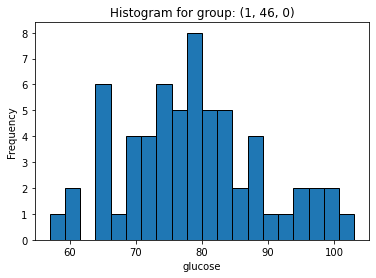

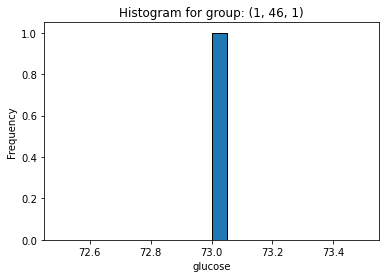

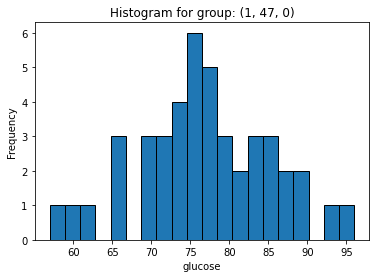

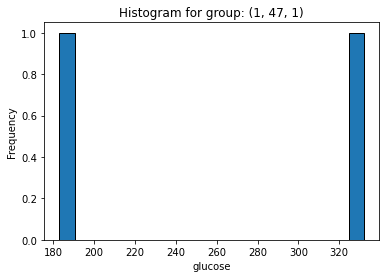

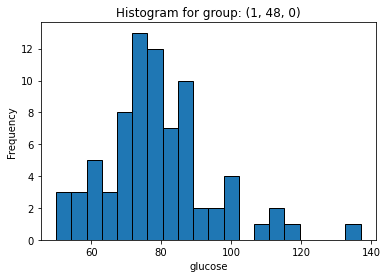

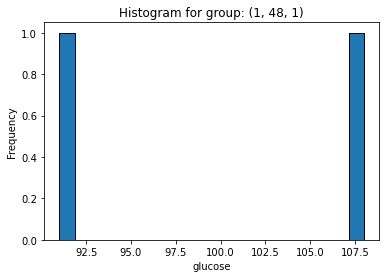

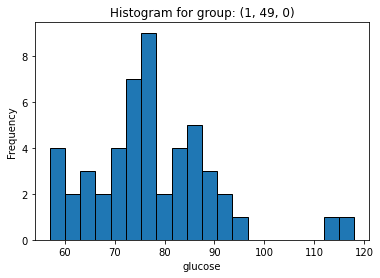

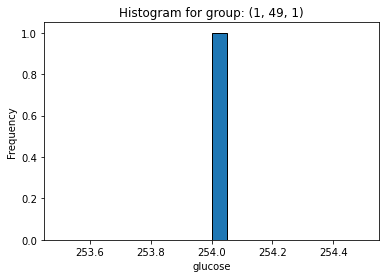

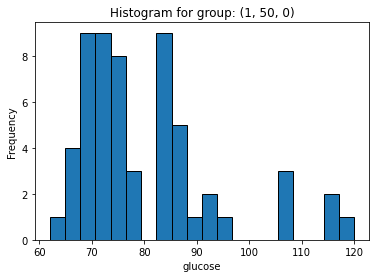

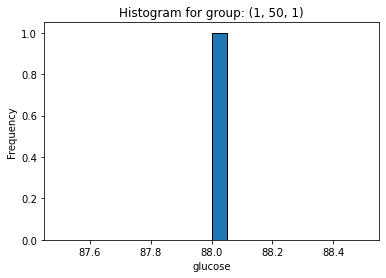

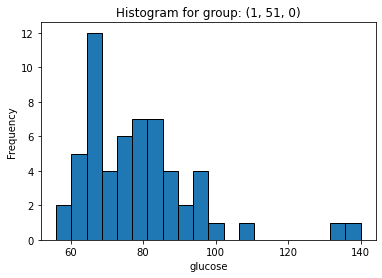

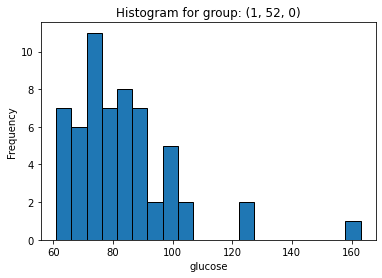

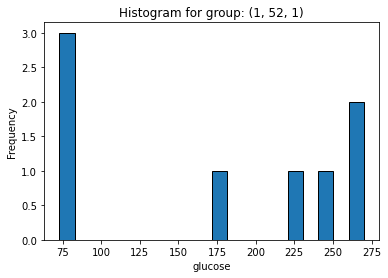

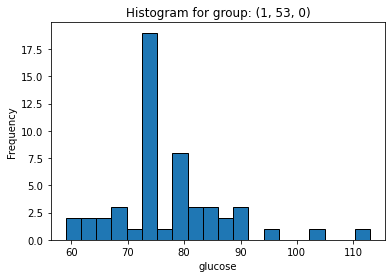

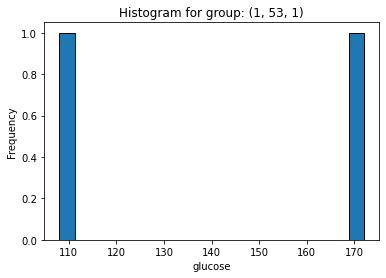

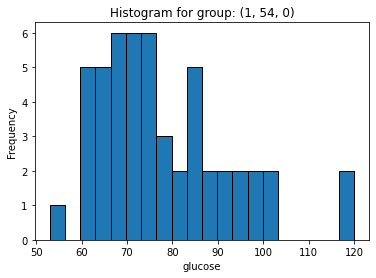

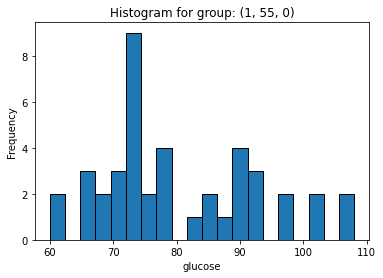

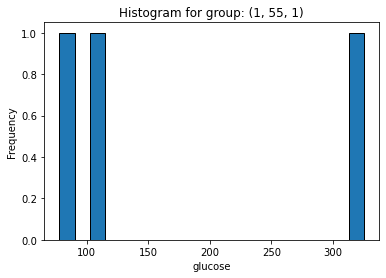

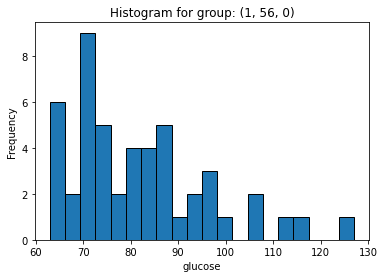

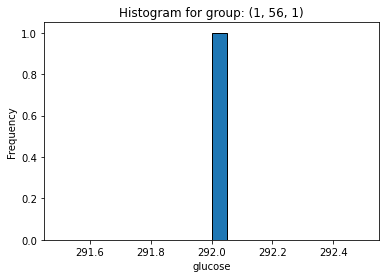

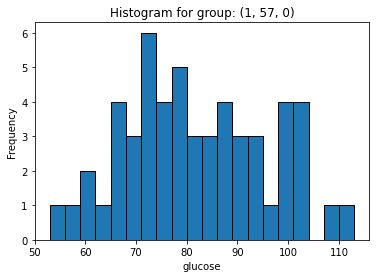

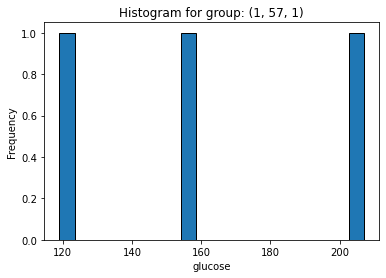

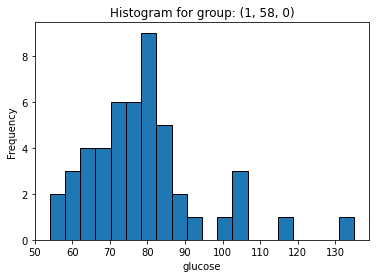

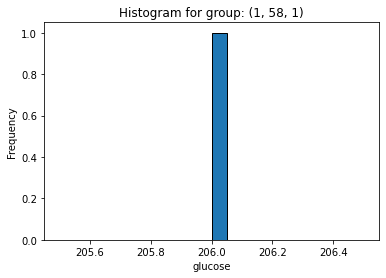

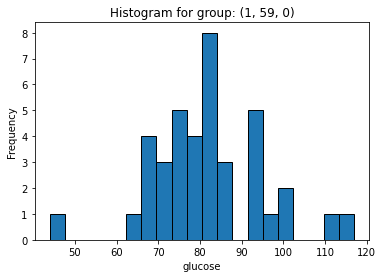

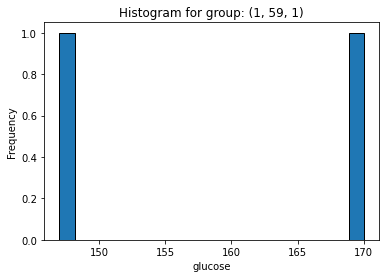

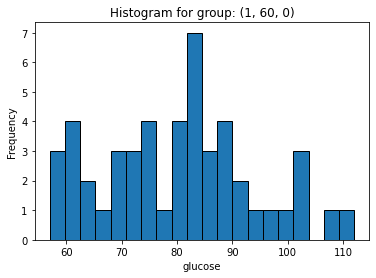

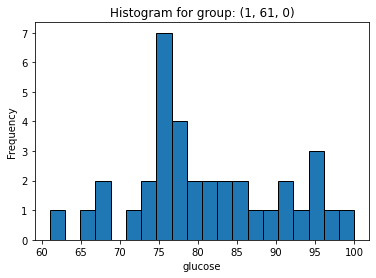

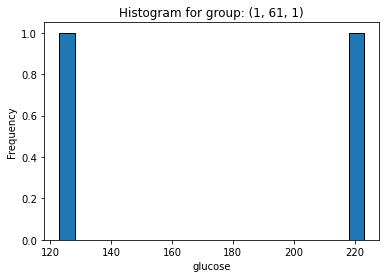

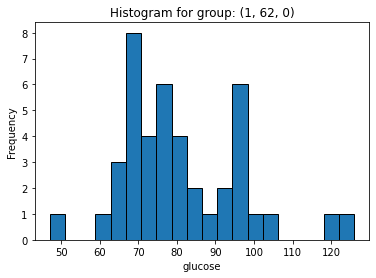

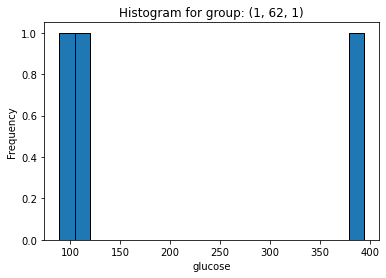

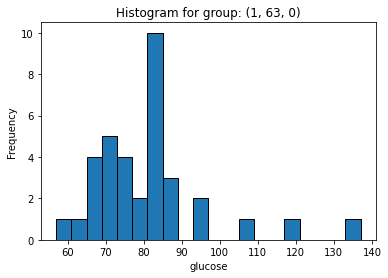

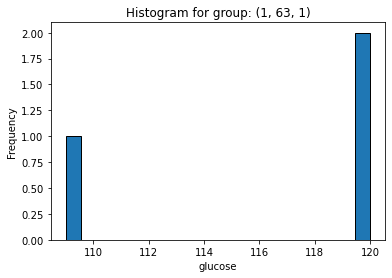

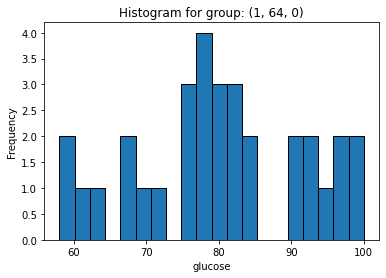

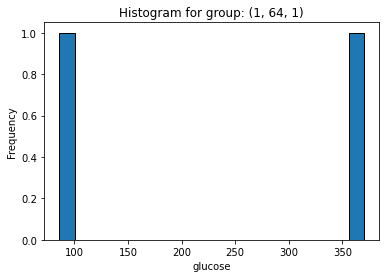

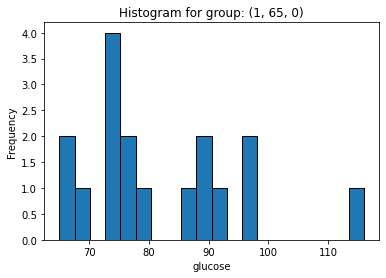

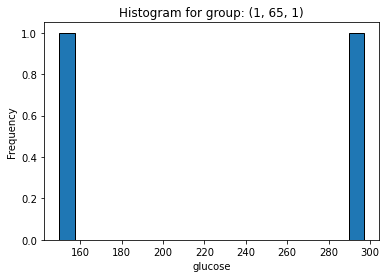

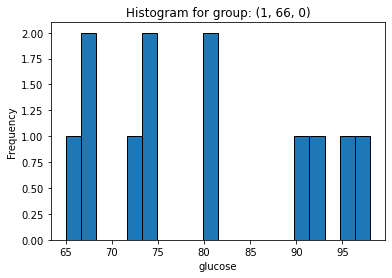

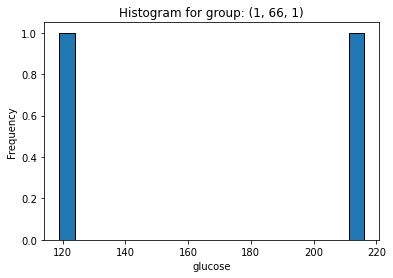

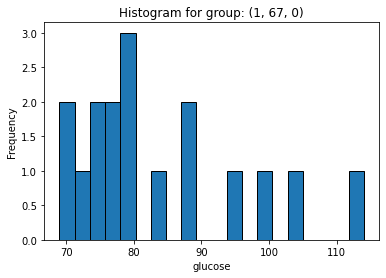

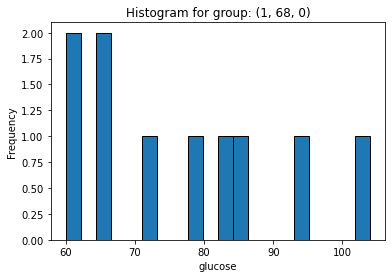

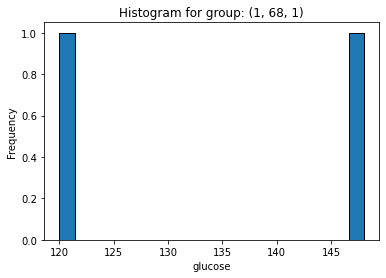

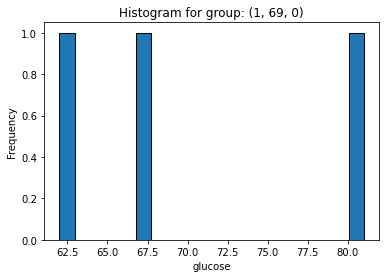

In [91]:
# checking skewness for glucose in some groups
for name, group in df.groupby(['gender', 'age', 'diabetes']):
    plt.hist(group['glucose'].dropna(), bins=20, edgecolor='black')
    plt.title(f'Histogram for group: {name}')
    plt.xlabel('glucose')
    plt.ylabel('Frequency')
    plt.show()

In [92]:
# since most of the groups don't follow a normal distribution,using median instead of mean to fill null values seems better!
# Fill missing glucose values based on median within groups of gender, age, and diabetes
df['glucose'] = df['glucose'].fillna(df.groupby(['gender', 'age', 'diabetes'])['glucose'].transform('mean'))

In [93]:
# For the remaining null value in glucose
df['glucose'] = df['glucose'].fillna(df['glucose'].mean())

###### Filling other features with null values

In [94]:

df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].median())
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

In [95]:
df.isnull().sum()

gender             0
age                0
education          0
currentSmoker      0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

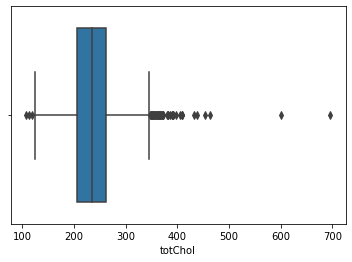

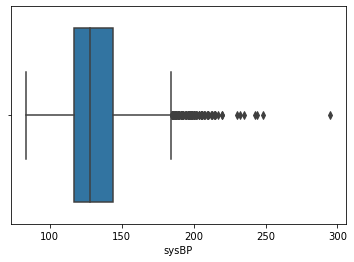

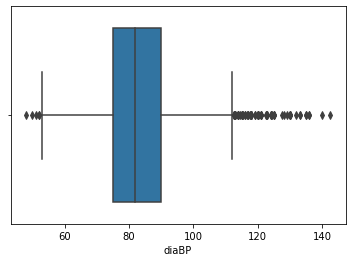

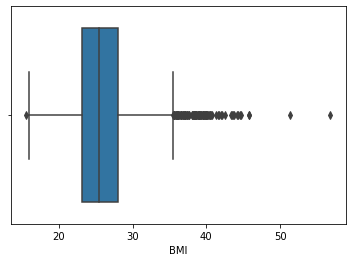

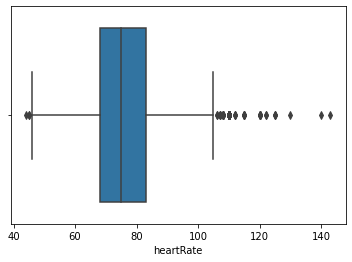

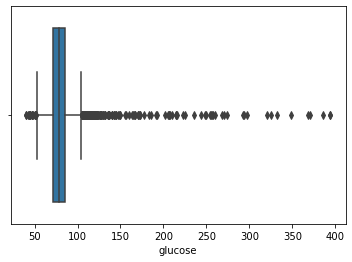

In [96]:
#Box plot for non binary features
selected_columns = df.drop(columns={'gender', 'age', 'education', 'prevalentHyp', 'diabetes', 'TenYearCHD', 'BPMeds', 'prevalentStroke', 'currentSmoker'})
for i in selected_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[i])
    plt.show()

#### Defining train and test data

In [97]:
X = df.drop(columns={'TenYearCHD'})
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression from scratch

In [98]:
# defining necessary functions

def compute_z(X):
    z = np.dot(X, w) + b
    return z


def sigmoid_function(z):
    sf = 1 / (1+np.exp(-z))
    return sf

def log_loss_function(y_train, y_pred_prob):
    # small value to prevent log(0).
    # Any value less than 1e-15 becomes 1e-15 and any value greater than 1 - 1e-15 becomes 1 - 1e-15
    epsilon = 1e-15  
    y_pred_prob = np.clip(y_pred_prob, epsilon, 1 - epsilon)
    loss = -(1/y_train.shape[0]) * np.sum(y_train*np.log(y_pred_prob) + (1 - y_train)*np.log(1 - y_pred_prob))
    return loss

def gradient_descent(feature_data_frame, label_data_frame , y_pred_prob):
    X = feature_data_frame.values
    m=label_data_frame.shape[0]
    dw = (1/m)*np.dot(np.transpose(X),(y_pred_prob - label_data_frame))
    db = (1/m)*np.sum(y_pred_prob - label_data_frame)
    return dw, db



In [99]:
X = X_train.values
w = np.random.randn(X.shape[1]) * 0.01
b = 0.01
learning_rate = 0.01
epoch_count = 50
losses = []

for i in range(epoch_count):
    z = compute_z(X_train)
    y_pred_prob = sigmoid_function(z)
    loss = log_loss_function(y_train, y_pred_prob)
    losses.append(loss)
    dw, db = gradient_descent(X_train, y_train, y_pred_prob)
    w = w - learning_rate * dw
    b = b - learning_rate * db

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_7348/1948454945.py:9: RuntimeWarning: overflow encountered in exp
  sf = 1 / (1+np.exp(-z))


In [100]:
print(losses)

[0.6346780672611582,
 5.297983399809309,
 5.297983399809309,
 22.326052588522327,
 5.297983399809309,
 5.297983399809309,
 5.297983399809309,
 5.297983399809309,
 5.297983399809309,
 1.3209788532932716,
 29.24146994041838,
 5.297983399809309,
 5.297983399809309,
 5.297983399809309,
 5.297983399809309,
 5.28823496428185,
 29.24146994041838,
 5.297983399809309,
 5.297983399809309,
 5.297983399809309,
 5.297983399809309,
 5.297983399809309,
 29.24146994041838,
 5.297983399809309,
 5.297983399809309,
 5.297983399809309,
 5.297983399809309,
 5.297983399809309,
 24.51451627010107,
 5.297983399809309,
 5.297983399809309,
 5.297983399809309,
 5.297983399809309,
 5.297983399809309,
 2.387475052106862,
 5.297983399809309,
 14.446662282170307,
 5.297983399809309,
 5.297983399809309,
 5.297983399809309,
 5.297983399809309,
 5.297983399809309,
 2.0074274245190344,
 28.290245322509662,
 5.297983399809309,
 5.297983399809309,
 5.297983399809309,
 5.297983399809309,
 5.297983399809309,
 4.851040482780

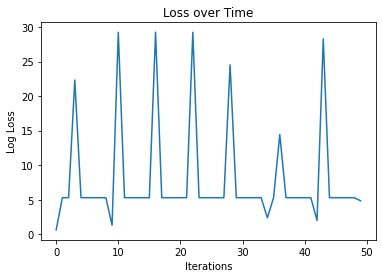

In [101]:
# Tracking learning process of the model
plt.plot(range(epoch_count), losses)
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.title("Loss over Time")
plt.show()

In [102]:
z_test = np.dot(X_test, w) + b
y_test_prob = sigmoid_function(z_test)
# Labeling
y_test_pred = (y_test_prob >= 0.5).astype(int)


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_7348/1948454945.py:9: RuntimeWarning: overflow encountered in exp
  sf = 1 / (1+np.exp(-z))


#### Evaluation

In [103]:
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Accuracy: 0.8537735849056604


<AxesSubplot:>

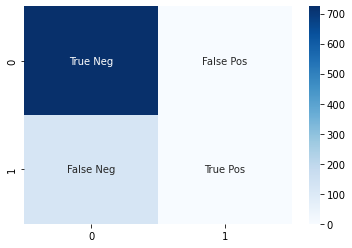

In [105]:
cf_matrix=confusion_matrix(y_test, y_test_pred)
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')